In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport  # Updated to ydata_profiling
import sweetviz as sv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load the Telco customer churn dataset into a DataFrame
data = pd.read_csv('telco-customer-churn.csv')

In [ ]:
# 1. Data Preparation
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Handle missing values (example: fill or drop)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)  # Dropping rows with missing values in 'TotalCharges'

In [ ]:
print("Columns in the dataset:", data.columns)

# Check if 'Tenure' exists, otherwise correct or skip this step
numerical_features = ['Tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    if feature in data.columns:  # Ensure the feature exists in the dataset
        z_scores = np.abs((data[feature] - data[feature].mean()) / data[feature].std())
        data = data[z_scores < 3]
    else:
        print(f"Feature '{feature}' not found in the dataset.")

Columns in the dataset: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
# We filter out any values where Z-score is greater than 3 (beyond 3 standard deviations from the mean)
for feature in numerical_features:
    z_scores = np.abs((data[feature] - data[feature].mean()) / data[feature].std())
    data = data[z_scores < 3]  # Keeping only rows where z_score < 3

In [ ]:
# Convert categorical features to numerical using one-hot encoding
# This ensures that categorical data like 'gender' or 'InternetService' is handled correctly
data = pd.get_dummies(data, drop_first=True)

In [ ]:
# 2. Data Types

# Let's take a quick look at the data types of each column after our transformations
data_types = data.dtypes
print("Data types:\n", data_types)

Data types:
 SeniorCitizen                              int64
Tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
customerID_0003-MKNFE                       bool
                                          ...   
PaperlessBilling_Yes                        bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
Churn_Yes                                   bool
Length: 7062, dtype: object


In [ ]:
numeric_data = data.select_dtypes(include=[np.number])

In [ ]:
corr_matrix = numeric_data.corr()
print(corr_matrix)

                SeniorCitizen    Tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015683        0.219874      0.102411
Tenure               0.015683  1.000000        0.246862      0.825880
MonthlyCharges       0.219874  0.246862        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


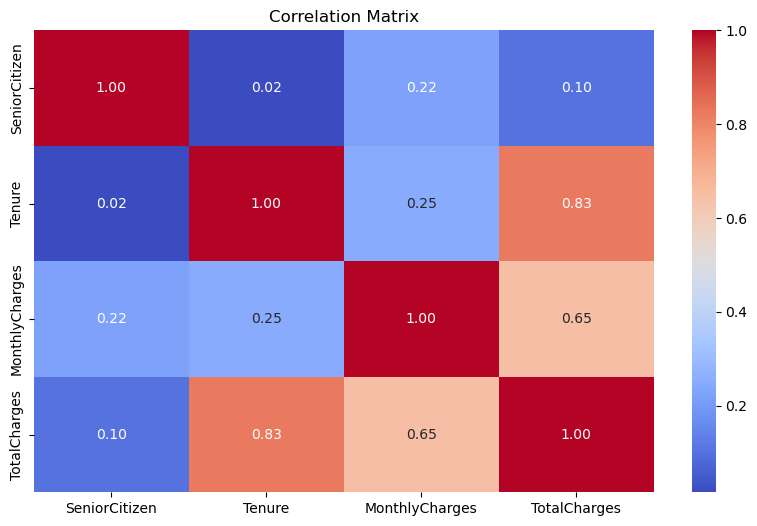

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Feature Importance using Logistic Regression
# We'll fit a logistic regression model to get an understanding of which features are most important in predicting churn

X = data.drop('Churn_Yes', axis=1)  # 'Churn_Yes' is our target (dependent variable)
y = data['Churn_Yes']

In [ ]:
# Instantiate and fit the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X, y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Extracting the coefficients (importance) of each feature and sorting them
feature_importance = pd.Series(log_model.coef_[0], index=X.columns).sort_values(ascending=False)
print("Feature importance:\n", feature_importance)

Feature importance:
 customerID_6323-AYBRX    0.574194
customerID_0607-DAAHE    0.573641
customerID_3400-ESFUW    0.572677
customerID_3512-IZIKN    0.572477
customerID_1043-YCUTE    0.571781
                           ...   
customerID_2545-EBUPK   -0.468043
customerID_5150-ITWWB   -0.480775
Contract_One year       -0.546715
TechSupport_Yes         -0.628557
Contract_Two year       -2.917420
Length: 7061, dtype: float64


In [ ]:
# Instantiate and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Ensure max_iter is high to avoid convergence issues
model.fit(X, y)  # X is your feature set, y is the target variable

# Extract and sort feature importance
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print(feature_importance)  # Check if this prints the correct values

customerID_6323-AYBRX    0.574194
customerID_0607-DAAHE    0.573641
customerID_3400-ESFUW    0.572677
customerID_3512-IZIKN    0.572477
customerID_1043-YCUTE    0.571781
                           ...   
customerID_2545-EBUPK   -0.468043
customerID_5150-ITWWB   -0.480775
Contract_One year       -0.546715
TechSupport_Yes         -0.628557
Contract_Two year       -2.917420
Length: 7061, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


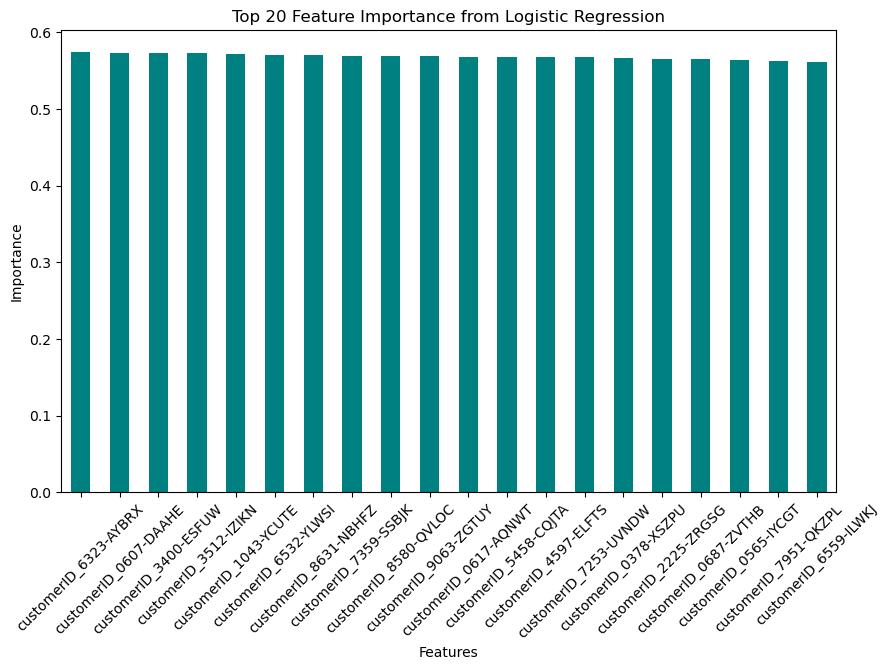

In [ ]:
# Plot the top 20 features by importance
top_n = 20
plt.figure(figsize=(10, 6))
feature_importance.head(top_n).plot(kind='bar', color='teal')
plt.title(f'Top {top_n} Feature Importance from Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 4. Data Splitting and SweetViz Comparison Report
# Split the dataset into training and testing sets (80% training, 20% testing)
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
print(train.columns)
print(test.columns)

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object', length=7062)
Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Ye

In [ ]:
# Clean column names by stripping whitespace and replacing special characters
train.columns = train.columns.str.strip().str.lower().str.replace(' ', '_', regex=False)
test.columns = test.columns.str.strip().str.lower().str.replace(' ', '_', regex=False)

In [ ]:
# Step 4: Check the actual columns in both datasets before attempting to drop
print("Training Data Columns:")
print(train.columns.tolist())

print("\nTest Data Columns:")
print(test.columns.tolist())

# Use errors='ignore' to avoid KeyError
train_filtered = train.drop(columns=["customerid"], errors='ignore')
test_filtered = test.drop(columns=["customerid"], errors='ignore')

# Verify columns after dropping
print("Columns in Training Data after drop:")
print(train_filtered.columns.tolist())

print("\nColumns in Test Data after drop:")
print(test_filtered.columns.tolist())

Training Data Columns:
['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'customerid_0003-mknfe', 'customerid_0004-tlhlj', 'customerid_0011-igkff', 'customerid_0013-exchz', 'customerid_0013-mhzwf', 'customerid_0013-smeoe', 'customerid_0014-bmaqu', 'customerid_0015-uocoj', 'customerid_0016-qljis', 'customerid_0017-dinoc', 'customerid_0017-iudmw', 'customerid_0018-nyrou', 'customerid_0019-efaep', 'customerid_0019-gfntw', 'customerid_0020-inwck', 'customerid_0020-jdnxp', 'customerid_0021-ikxgc', 'customerid_0022-tcjci', 'customerid_0023-hghwl', 'customerid_0023-uyupn', 'customerid_0023-xuopt', 'customerid_0027-kwykw', 'customerid_0030-fnxpp', 'customerid_0031-pvlzi', 'customerid_0032-pgels', 'customerid_0036-ihmot', 'customerid_0040-halcw', 'customerid_0042-jvwoj', 'customerid_0042-rlhyp', 'customerid_0048-lumls', 'customerid_0048-pihnl', 'customerid_0052-dckon', 'customerid_0052-ynyot', 'customerid_0056-epfbg', 'customerid_0057-qbuqh', 'customerid_0058-evzwm', 'customerid_006

In [ ]:
# Replace 'Churn_Yes' with the exact name found in Step 3
X_train = train.drop('churn_yes', axis=1)  # Adjust if different
y_train = train['churn_yes']                 # Adjust if different
X_test = test.drop('churn_yes', axis=1)     # Adjust if different
y_test = test['churn_yes']                   # Adjust if different

In [ ]:
# Check for NaN or infinite values
print("Checking for NaN values:")
print(X_train.isna().sum())

print("\nChecking for infinite values:")
print(np.isinf(X_train).sum())

Checking for NaN values:
seniorcitizen                            0
tenure                                   0
monthlycharges                           0
totalcharges                             0
customerid_0003-mknfe                    0
                                        ..
contract_two_year                        0
paperlessbilling_yes                     0
paymentmethod_credit_card_(automatic)    0
paymentmethod_electronic_check           0
paymentmethod_mailed_check               0
Length: 7061, dtype: int64

Checking for infinite values:
seniorcitizen                            0
tenure                                   0
monthlycharges                           0
totalcharges                             0
customerid_0003-mknfe                    0
                                        ..
contract_two_year                        0
paperlessbilling_yes                     0
paymentmethod_credit_card_(automatic)    0
paymentmethod_electronic_check           0
paymentmethod_

In [ ]:
# Summary statistics of the training set
print(X_train.describe())

       seniorcitizen       tenure  monthlycharges  totalcharges
count    5625.000000  5625.000000     5625.000000   5625.000000
mean        0.160711    32.335289       64.697431   2275.300871
std         0.367297    24.537144       30.173948   2265.083247
min         0.000000     1.000000       18.250000     18.850000
25%         0.000000     9.000000       35.200000    397.000000
50%         0.000000    29.000000       70.350000   1388.000000
75%         0.000000    55.000000       89.900000   3767.400000
max         1.000000    72.000000      118.750000   8684.800000


In [ ]:
# Option 1: Fill NaN values with the mean or median
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Option 2: Drop rows with NaN or infinite values
# X_train.dropna(inplace=True)
# X_test.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Re-train the logistic regression model on the scaled training data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
logreg = LogisticRegression(max_iter=1000, C=1e-4)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
log_reg = LogisticRegression(max_iter=2000, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

In [ ]:
# Scale the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

# Convert X_test_scaled to NumPy array if necessary (but it usually won't be needed)
y_pred = log_reg.predict(X_test_scaled)

In [ ]:
# Assuming you have already fitted the model with X_train (as a NumPy array)
y_pred = log_reg.predict(X_test.to_numpy())  # Convert DataFrame to NumPy array

In [ ]:
print(y_train.value_counts())

churn_yes
False    4130
True     1495
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [ ]:
# Initialize Logistic Regression with class weights
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced')

# Fit the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.92      0.86      1033
        True       0.66      0.40      0.50       374

    accuracy                           0.78      1407
   macro avg       0.73      0.66      0.68      1407
weighted avg       0.77      0.78      0.77      1407

Accuracy Score: 0.7846481876332623
